# 課題8 線形回帰

配点
- Q1.1 0.5P
- Q1.2 0.5P
- Q1.3 2P
- Q1.4 1P
- Q2 2P
- Q3.1 1P
- Q3.2 3P

In [3]:
# モジュールのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Q1.1 特徴間の相関係数（復習）

irisデータセットの特徴量`petal_length`と`petal_width`の関係を散布図で可視化すると以下のように2つの特徴量間に関係があることがわかります。

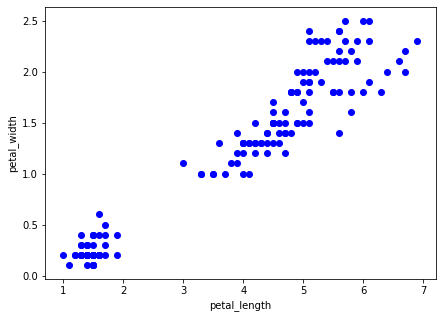

In [4]:
iris = pd.read_csv('iris.csv')

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(iris['petal_length'], iris['petal_width'], c='blue');

irisデータセットの特徴量`petal_length`と`petal_width`のデータを`NumPy`の1次元配列として受け取って、それらの相関係数を返す以下の関数`petal_corr()`を完成させてください。

In [ ]:
def petal_corr(x, y):
    return ### 1次元配列xと1次元配列yの相関係数を計算するコード ###

関数`petal_corr()`が完成したら以下のセルを実行して動作を確認してください。以下では`pandas`シリーズオブジェクトの`values`属性を用いて特徴量データを`NumPy`の配列にして関数`petal_corr()`の引数に渡しています。相関係数は$\simeq0.96$となります。

In [ ]:
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

In [ ]:
petal_corr(X, y)

In [ ]:
assert int(petal_corr(X, y)*100) == 96

## Q1.2 特徴量の標準化（復習）

以下では、線形回帰により特徴量`petal_length`から特徴量`petal_width`を予測するような仮説関数のパラメータを学習することを考えます。

まず準備として、特徴量`petal_length`を入力$X$、特徴量`petal_length`を出力$y$としてそれぞれを標準化します。

`NumPy`の任意の行数、列数の2次元配列を受け取り、各要素の値をその列の平均値と標準偏差を用いて標準化した配列を返す`normalizer()`関数を完成させてください。

In [ ]:
def normalizer(mat):
    return ### 配列matを列ごとに標準化した配列を計算するコード ###

`normalizer()`関数が完成したら、以下のセルを実行して標準化された`X`、`y`それぞれのすべての要素の整数値の和を求めることで動作を確認してください。それぞれのすべての要素の整数値の和は`-25`、`-19`となります。（コードによってはそうならない場合もあります）

In [ ]:
print(normalizer(X).astype(np.int64).sum())
print(normalizer(y).astype(np.int64).sum())

In [ ]:
assert normalizer(X).astype(np.int64).sum() == -25
assert  normalizer(y).astype(np.int64).sum() == -19

次に、入力の各データにバイアス項($x_0=1$)を追加するため、入力の先頭列に1を要素とする列ベクトルを挿入します。これにより、入力,　出力はデータ数を$m$として以下のような行列（$m \times 2$) とベクトル($m \times 1$)になります。

$
  X = \left(
    \begin{array}{cc}
      1 &   x^{(1)} \\
      1 &   x^{(2)}  \\
      ... & ... \\
      1 &  x^{(m)}
    \end{array}
  \right)
$

$x^{(i)}$は標準化された特徴量petal_length。

$
  y = \left(
    \begin{array}{c}
       y^{(1)}  \\
      ...\\
        y^{(m)}  \\
    \end{array}
  \right)
$

$y^{(i)}$は標準化された特徴量petal_width。

In [ ]:
X_norm = normalizer(X) # 入力の標準化
y_norm = normalizer(y) # 出力の標準化

X_norm = np.hstack([np.ones((X.shape[0],1)), X_norm]) # バイアス項の追加

print(X_norm[:10,:]) # 先頭10行のデータ
print(y_norm[:10]) # 先頭10行のデータ

## Q1.3 最急降下法

以下では、最急降下法により、訓練データセットを元に入力から出力を予測する仮説関数のパラメータを学習する`graddes`関数を実装します。

`graddes`関数では第1引数に入力のデータ行列（データ数($m$)$\times$(特徴量数+バイアス)($n$))、第2引数に入力の各データに対する出力（正解）のベクトル（$m\times1$）、第3引数に学習率、第4引数に学習の繰り返し（各繰り返しをエポックと呼ぶ）の回数を受け取ります。

これらの引数を元に、`graddes`関数ではパラメータの学習を行い、以下を返します
- エポックごとのコスト関数の値を要素とするリスト
- 最終的なパラメータの値を要素とする配列（$n\times1$）を返します。



パラメータを$\theta=(\theta_0, \theta_1, ..., \theta_{n-1})^T$

仮説関数を$h(x)=\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n-1}x_{n-1}$

入力を$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n-1}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n-1}^{(m)}  \\
    \end{array}
  \right)
$ 

$X$において$x_0^{(i)}=1$

出力を$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$

とすると、最急降下法ではコスト関数を

$J(\theta)=\frac{1}{2m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})^2$

として、入力$X$の各特徴量$x_j$に対するパラメータ$\theta_j$を以下の様に更新していきます。

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$

パラメータ全体を以下のように一度に更新することもできます。

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta-y)$

入力が1特徴量（変数）の時は、バイアス項に対するパラメータを$\theta_0$、入力変数に対するパラメータを$\theta_1$としてパラメータは以下の様に更新されます。

$\theta_0 := \theta_0 - \alpha  \Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})/m$ 

$\theta_1 := \theta_1 - \alpha  \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})/m$

具体的に、`graddes`関数では以下の手順によりパラメータの学習を行います。

- 引数`n_iter`で指定されたエポックの回数だけ以下を繰り返す    

     - すべてのm個のデータについて以下を求める
        
        - 入力データ$x^{(i)}$について仮説関数$h(x^{(i)})$の値を求める
        
        - 出力$y^{(i)}$との誤差$h(x^{(i)})-y^{(i)}$の値を求める
    
     - すべてのm個のデータの誤差を用いてコスト関数$J(\theta)$の値を求め、各エポックのコスト関数の値を要素とするリスト`costs`に追加
 
     - すべてのm個のデータの誤差を用いて各パラメータ$\theta_j(j=0,..,n-1)$を更新し、パラメータの値を要素とする配列`w`を更新
          - `w[0,0]`$:=$($x_0$に対するパラメータ$\theta_0$), 
          - ...,
          - `w[n-1,0]`$:=$($x_{n-1}$に対するパラメータ$\theta_{n-1}$)
          
 すべての繰り返しが終了したらリスト`costs`と配列`w`を返す。
 
 上記に従って、`graddes`関数を完成させてください。

In [ ]:
def graddes(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n =  X.shape[1] # 次元（特徴量+バイアス）数
    
    costs=[] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  各特徴量に対するパラメータ（重み）の初期化
    
    for i in range(n_iter):

        ### コスト関数の計算とパラメータの更新をするコード ###
            # graddes関数は任意の次元数の入力Xを想定していますが、この一般的な実装が難しければ
            # まずは上記の定義に従って以下のように1変数+バイアス項の入力（対応するパラメータは2つ）で
            # 動くものを実装してもらっても構いません
                # すべてのm個のデータの誤差(h(x)-y)を求める
                # コスト関数Jを計算
                #　costsにコスト関数の値を追加
                # パラメータθ_0とθ_1を計算
                # w[0,0]=更新されたパラメータθ_0,
                # w[1,0]=更新されたパラメータθ_1
            
            # パラメータ更新ではデータ数についてのfor文とパラメータ数のfor文を回して更新していくことが考えられますが
            # 上記のパラメータ全体を更新する行列・ベクトル演算でこれらのfor文なしにパラメータを更新できます。
            # numpyに慣れている人はこちらの方針で実装してもらって構いません
        
    return costs, w

## Q1.4 最急降下法によるパラメータ推定
`graddes`関数が完成したら以下のセルを実行して動作を確認してください。上記のirisデータセットの特徴量`petal_length`を入力、特徴量`petal_length`を出力とした訓練データセットを与え、学習率を0.05、学習のエポック数を20とした時の最終的なコスト関数の値は$\simeq 0.102$となります。

In [ ]:
n_iter=20
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1]) # 100エポックでのコスト関数の値
print(w) # 推定されたパラメータ

In [ ]:
assert int(costs[-1]*1000) == 102

以下では、パラメータ推定の過程の各エポックとコスト関数の値の関係を示しています。パラメータの学習が進むにつれてコスト関数の値が減少していくことがわかります。

In [ ]:
plt.figure(figsize=(7,5))
plt.ylabel('Cost')
plt.xlabel('Iteration');
plt.plot(range(1,n_iter+1),costs);

学習率0.05、学習のエポック数20として学習されたパラメータ$\theta_0, \theta_1$を用いて特徴量`petal_length`を入力$x$、特徴量`petal_length`を出力$y$とした時の直線$y=\theta_0+\theta_1x$は以下のようになります。

In [ ]:
# 回帰直線のプロット
def lineplot(X,y,w):
    plt.figure(figsize=(7,5))
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.scatter(X[:,1],y[:,0],c='blue')
    plt.plot(X[:,1], np.dot(X,w)[:,0], color='red');

lineplot(X_norm, y_norm, w)

また、この時のコスト関数$J(\theta)$とパラメータ$\theta_0, \theta_1$は以下のようになります。

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# コスト関数のプロット
def costplot(X, y, w, cost):
    w0, w1 = np.meshgrid(np.arange(-3.0, 3.0, 0.1), np.arange(-3.0, 3.0, 0.1))
    J=np.zeros(w0.shape)
    for i in range(w0.shape[0]):
        for j in range(w0.shape[1]):
            J[i,j] = np.sum((np.dot(X, np.array([[w0[i,j]],[w1[i,j]]]))-y)**2)/(2*X.shape[0])
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlabel("theta0")
    ax.set_ylabel("theta1")
    ax.scatter(w[0,0], w[1,0], cost, s=100, c='red')
    ax.plot_wireframe(w0, w1, J);

costplot(X_norm, y_norm, w, costs[-1] )

学習率$\alpha$やエポック数を変更して、その時の最終的なパラメータ、コスト関数の値をそれぞれ観察してください。

コスト関数の値が十分に収束した時の学習率、エポック数で学習されたパラメータを用いて回帰直線を可視化してください。

In [ ]:
n_iter = #エポック数
alpha = #学習率
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1]) # コスト関数の値
print(w) # 推定されたパラメータ

# エポック数 vs. コスト関数
plt.figure(figsize=(7,5))
plt.ylabel('Cost')
plt.xlabel('Iteration');
plt.plot(range(1,n_iter+1),costs);

# 回帰直線
lineplot(X_norm, y_norm, w)

# コスト関数
costplot(X_norm, y_norm, w, costs[-1] )

## Q2 正規方程式
線形回帰のパラメータは訓練データセットの入力$X$と出力$y$に対して以下の正規方程式を解くことで解析的に求めることができます。（ただし、$X^TX$が正則（フルランク）であること。）

$\theta = (X^TX)^{-1}X^Ty$

ここで、行列$A$の転置$A^T$、逆行列$A^{-1}$は`NumPy`を用いてそれぞれ以下の様に計算できます。

転置$A^T$
```Python
A.T
```

逆行列$A^{-1}$
```Python
np.linalg.inv(A)
```

正規方程式を用いて、訓練データセットを元に入力から出力を予測する仮説関数のパラメータを求める`normal_equation`関数を実装してください。`normal_equation`関数では第1引数に入力のデータ行列（データ数($m$)$\times$次元数($n$))、第2引数に入力の各データに対する出力（正解）のベクトル（$m\times1$）を受け取り、パラメータ$\theta$の値を要素とする配列（$n\times1$）（Q1.3のパラメータの配列`w`と同様の形式）を返します。

In [ ]:
def normal_equation(X, y):
    return ### 正規方程式を用いてX,yからパラメータを求めるコード ###

`normal_equation`関数が完成したら以下のセルを実行して動作を確認してください。先の最急降下法で求めたパラメータの推定値が正規方程式に基づくパラメータの解析解とよく近似していることがわかります。

In [ ]:
w=normal_equation(X_norm, y_norm)
print(w)

lineplot(X_norm, y_norm, w)

## Q3 応用

以下のような形式の市区町村別統計データのファイル、"SSDSE2019.csv"、を読み込みます。

```Python
## SSDSE2019.csvファイル
Code, Prefecture, Municipality, A1101, A110101, A110102, ..., I6100
Year, 年度, 年度, 2015, 2015, 2015, ..., 2016
地域コード, 都道府県, 市区町村, 人口総数, 人口総数（男）, 人口総数（女）, ..., 医師数
R01100, 北海道, 札幌市, 1952356, 910614, 1041742, ..., 6614
R01202, 北海道, 函館市, 265979, 120376, 145603, ..., 801
R01203, 北海道, 小樽市, 121924, 54985, 66939, ..., 322
...
```

`pandas`モジュールでは、"SSDES2019.csv"ファイルから以下のようにデータフレーム`df`を作成できます。この時、csvファイルの2,3行目（日本語ヘッダ）は`skiprows=[1,2]`で読み飛ばしています。
```Python
df = pd.read_csv('SSDSE2019.csv',  skiprows=[1,2])
```

In [6]:
df = pd.read_csv('SSDSE2019.csv', skiprows=[1,2], encoding="utf-8")
df.head()

,Code,Prefecture,Municipality,A1101,A110101,A110102,A1102,A110201,A110202,A1301,...,H6131,H6132,I510120,I5102,I5103,I6100,I6200,I6300,J2503,J2506
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,8502,355,178,1329,1232,6614,2113,5398,273,25742
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,...,1749,41,28,216,131,801,183,680,47,3438
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,...,778,17,12,84,79,322,102,326,21,1350
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,...,1743,65,36,242,177,1339,254,867,61,5290
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,...,621,11,6,55,45,272,63,196,10,1017



各市区町村の人口総数（A1101）と医師数（I6100）の関係を散布図で可視化すると以下のように2つの統計に関係があることがわかります。

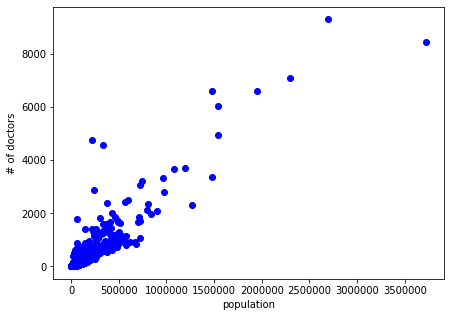

In [7]:
plt.figure(figsize=(7,5))
plt.xlabel('population')
plt.ylabel('# of doctors')
plt.scatter(df['A1101'], df['I6100'], c='blue');

### Q3.1
上記で行った線形回帰のパラメータ推定を参考に、各市町村の人口総数$x$から医師数$y$を予測するような仮説関数$y=\theta_0+\theta_1x$のパラメータ$\theta_0, \theta_1$を学習し、学習されたパラメータを元に回帰直線を可視化してください。

In [ ]:
X=df[['A1101']].values # 入力：人口総数
y=df[['I6100']].values # 出力: 医師数

###  線形回帰により人口総数から医師数を予測するような仮説関数のパラメータを学習し、
### 学習されたパラメータを元に回帰直線を可視化 

### Q3.2
各市町村の複数の特徴量、例えば総人口、75歳人以上人口、総面積など、を入力$X$として医師数$y$を予測するような仮説関数$y=\theta_0+\theta_1x_1+...+\theta_{k}x_{k}+...$のパラメータ$\theta$を線形回帰により学習し、特徴量ごとのパラメータについてどのようなことが言えるか論じてください。

In [ ]:
X=df[[### 複数の特徴量 ###]].values
y=df[['I6100']].values 

...

## 参考：scikit-learnでの線形回帰
`scikit-learn`では、以下の手順でデータからモデルの学習を行います。
- 使用するモデルのクラスの選択
- モデルのハイパーパラメータの選択とインスタンス化
- データの準備
    - 教師あり学習では、特徴量データとラベルデータを準備
    - 教師あり学習では、特徴量・ラベルデータをモデル学習用の学習データとモデル評価用のテストデータに分ける
- モデルをデータに適合（`fit()`メソッド）
- モデルの評価
    - 教師あり学習では、`predict()`メソッドを用いてテストデータの特徴量データからラベルデータを予測しその精度を評価を行う
    
以下では、回帰を行うモデルの一つである**線形回帰**（**`LinearRegression`**）クラスをインポートしています。`mean_squared_error()`は平均二乗誤差によりモデルの予測精度を評価するための関数です。

データセットを訓練データ（`X_train`, `y_train`）とテストデータ（`X_test`, `y_test`)に分割し、線形回帰クラスのインスタンスの`fit()`メソッドによりモデルを訓練データに適合させています。そして、`predict()`メソッドを用いてテストデータのpetal_lengthの値からpetal_widthの値を予測し、`mean_squared_error()`関数で実際のpetal_widthの値（`y_test`）と比較して予測精度の評価を行なっています。

0.0887003295706348
0.8950383106305648
[[0.96853307]]
[-6.70346624e-17]


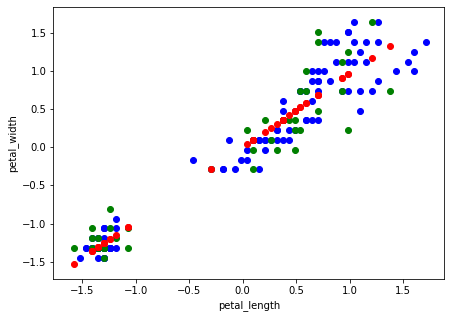

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

iris = pd.read_csv('iris.csv')
X=iris[['petal_length']].values # 入力X
y=iris[['petal_width']].values # 出力y

# 訓練データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
sc=StandardScaler() 
sc.fit(X_train)
norm_X_train=sc.transform(X_train) 
norm_X_test=sc.transform(X_test) 

sc.fit(y_train)
norm_y_train=sc.transform(y_train) 
norm_y_test=sc.transform(y_test) 

# 学習モデルの訓練データへの適合
# LinearRegression()ではデフォルトでモデル内部でバイアス項が作られる（fit_intercept引数=True）
model=LinearRegression() 
model.fit(norm_X_train, norm_y_train) 

# 学習モデルを用いてテストデータから予測と評価
y_predicted=model.predict(norm_X_test) 
print(mean_squared_error(norm_y_test,y_predicted)) # 残差平方和
print(r2_score(norm_y_test, y_predicted)) # 決定係数

print(model.coef_) # 特徴量パラメータ
print(model.intercept_) # バイアス項パラメータ

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(norm_X_train[:,0], norm_y_train[:,0],c='blue') # 訓練データ
plt.scatter(norm_X_test[:,0], norm_y_test[:,0], c='green'); # テストデータ
plt.scatter(norm_X_test[:,0], y_predicted[:,0], c='red'); # テストデータの予測